Final Exam-  Association Rules:

#Context

1 - age (numeric)  
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",  
"blue-collar","self-employed","retired","technician","services")  
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
4 - education (categorical: "unknown","secondary","primary","tertiary")    
5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric)  
7 - housing: has housing loan? (binary: "yes","no")  
8 - loan: has personal loan? (binary: "yes","no")  
# related with the last contact of the current campaign:   
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12 - duration: last contact duration, in seconds (numeric)  
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
15 - previous: number of contacts performed before this campaign and for this client (numeric)  
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")  

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

Missing Attribute Values: None

Steps
1. ## Convert Categorical values to 0, 1
2. Create Training and Testing data, and check class distribution


In [1]:
import warnings 
warnings.simplefilter("ignore")  

import pandas as pd

data0=pd.read_excel('BankTrain.xlsx')

data0.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
data0.isnull().sum()  # get the number of missing data points per column

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [3]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data0.shape

(45211, 17)

In [5]:
data0.head().transpose() 

,0,1,2,3,4
age,58,44,33,47,33
job,management,technician,entrepreneur,blue-collar,unknown
marital,married,single,married,married,single
education,tertiary,secondary,secondary,unknown,unknown
default,no,no,no,no,no
balance,2143,29,2,1506,1
housing,yes,yes,yes,yes,no
loan,no,no,yes,no,no
contact,unknown,unknown,unknown,unknown,unknown
day,5,5,5,5,5


In [6]:
data0.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
cat_vars = ['poutcome', 'y', 'contact', 'job', 'default','month', 'marital','housing', 'day', 'duration', 'pdays']

In [8]:
data0.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [9]:
data1  = data0.copy()
data1=data1.drop(['poutcome', 'contact','month','previous', 'day', 'duration', 'pdays', 'campaign' ], axis = 1)# We do not use Default as the X variable to predict loan_requested

In [11]:
cat_cols = data1.select_dtypes(include=object).columns.tolist()
cat_cols

['job', 'marital', 'education', 'default', 'housing', 'loan', 'y']

In [12]:
a=   (pd.DataFrame(
        data1[cat_cols]
        .melt(var_name='column', value_name='value')
        .value_counts(normalize=True))
    .rename(columns={0: 'counts'})
    .sort_values(by=['column', 'counts']))

b=   (pd.DataFrame(
        data1[cat_cols]
        .melt(var_name='column', value_name='value')
        .value_counts(normalize=False))
    .rename(columns={0: 'counts'})
    .sort_values(by=['column', 'counts']))
b
#result =  a.merge(b, on=['column', 'counts'], how='left')

counts
column    value                
default   yes               815
          no              44396
education unknown          1857
          primary          6851
          tertiary        13301
          secondary       23202
housing   no              20081
          yes             25130
job       unknown           288
          student           938
          housemaid        1240
          unemployed       1303
          entrepreneur     1487
          self-employed    1579
          retired          2264
          services         4154
          admin.           5171
          technician       7597
          management       9458
          blue-collar      9732
loan      yes              7244
          no              37967
marital   divorced         5207
          single          12790
          married         27214
y         yes              5289
          no              39922

In [13]:
data_assoc = data1.copy()

In [14]:
data_assoc.corr()

,age,balance
age,1.000000,0.097783
balance,0.097783,1.000000


In [15]:
data_assoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   y          45211 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB


<AxesSubplot:title={'center':'age'}, xlabel='y'>

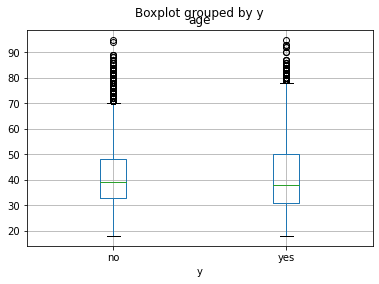

In [16]:
boxplot = data0.boxplot(column=['age'],  by='y')
boxplot


In [17]:
columns=data_assoc.columns.to_list()
print(columns)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'y']


In [18]:
cat_cols = data_assoc.select_dtypes(include=object).columns.tolist()
cat_cols

['job', 'marital', 'education', 'default', 'housing', 'loan', 'y']

In [19]:
num_cols = data_assoc.select_dtypes(include=int).columns.tolist()
num_cols

['age', 'balance']

In [20]:
data_assoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   y          45211 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB


In [21]:
data_assoc['age']=pd.qcut(data_assoc['age'],3) 
data_assoc['age'].value_counts()

(17.999, 35.0]    16907
(45.0, 95.0]      14448
(35.0, 45.0]      13856
Name: age, dtype: int64

<AxesSubplot:>

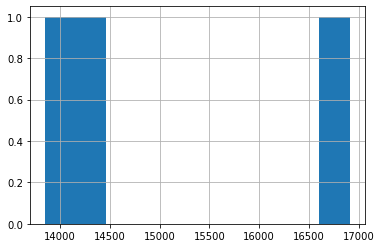

In [22]:
data_assoc['age'].value_counts().hist()

In [23]:
data_assoc['balance']=pd.qcut(data_assoc['balance'],4) 
data_assoc['balance'].value_counts()

(-8019.001, 72.0]     11317
(448.0, 1428.0]       11306
(1428.0, 102127.0]    11297
(72.0, 448.0]         11291
Name: balance, dtype: int64

<AxesSubplot:>

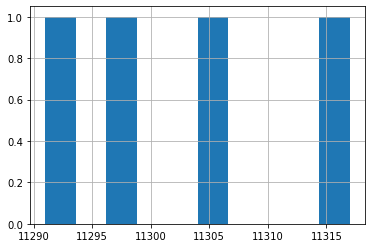

In [24]:
data_assoc['balance'].value_counts().hist()

In [25]:
data_assoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  category
 1   job        45211 non-null  object  
 2   marital    45211 non-null  object  
 3   education  45211 non-null  object  
 4   default    45211 non-null  object  
 5   balance    45211 non-null  category
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   y          45211 non-null  object  
dtypes: category(2), object(7)
memory usage: 2.5+ MB


In [26]:
cat_cols = data_assoc.select_dtypes(include=object).columns.tolist()
cat_cols

['job', 'marital', 'education', 'default', 'housing', 'loan', 'y']

In [27]:
data_assoc.head()

,age,job,marital,education,default,balance,housing,loan,y
0,"(45.0, 95.0]",management,married,tertiary,no,"(1428.0, 102127.0]",yes,no,no
1,"(35.0, 45.0]",technician,single,secondary,no,"(-8019.001, 72.0]",yes,no,no
2,"(17.999, 35.0]",entrepreneur,married,secondary,no,"(-8019.001, 72.0]",yes,yes,no
3,"(45.0, 95.0]",blue-collar,married,unknown,no,"(1428.0, 102127.0]",yes,no,no
4,"(17.999, 35.0]",unknown,single,unknown,no,"(-8019.001, 72.0]",no,no,no


In [28]:
data_assoc.to_csv('FinalExaml_BankResults_Data_for_Rules.csv', sep='\t',index=None)  #use tab \t as the separator because values has , in it.

data_assoc.head(9).transpose()


,0,1,2,3,4,5,6,7,8
age,"(45.0, 95.0]","(35.0, 45.0]","(17.999, 35.0]","(45.0, 95.0]","(17.999, 35.0]","(17.999, 35.0]","(17.999, 35.0]","(35.0, 45.0]","(45.0, 95.0]"
job,management,technician,entrepreneur,blue-collar,unknown,management,management,entrepreneur,retired
marital,married,single,married,married,single,married,single,divorced,married
education,tertiary,secondary,secondary,unknown,unknown,tertiary,tertiary,tertiary,primary
default,no,no,no,no,no,no,no,yes,no
balance,"(1428.0, 102127.0]","(-8019.001, 72.0]","(-8019.001, 72.0]","(1428.0, 102127.0]","(-8019.001, 72.0]","(72.0, 448.0]","(72.0, 448.0]","(-8019.001, 72.0]","(72.0, 448.0]"
housing,yes,yes,yes,yes,no,yes,yes,yes,yes
loan,no,no,yes,no,no,no,yes,no,no
y,no,no,no,no,no,no,no,no,no


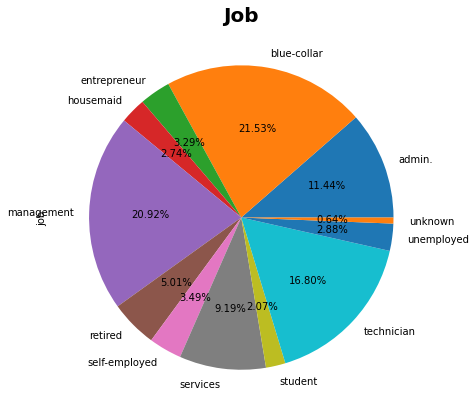

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


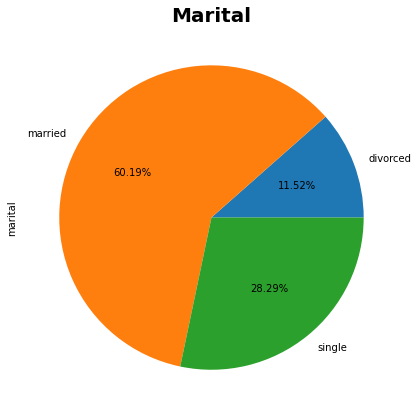

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


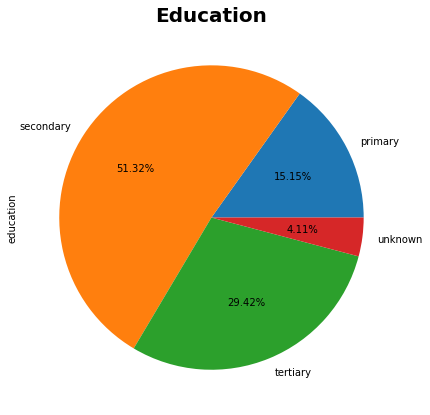

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


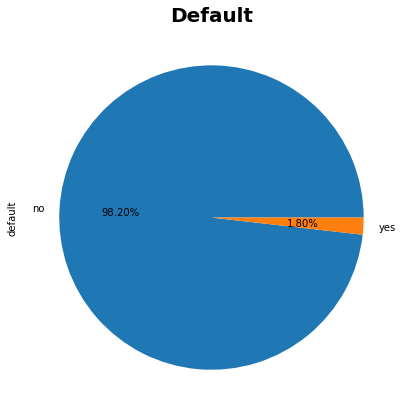

no     44396
yes      815
Name: default, dtype: int64


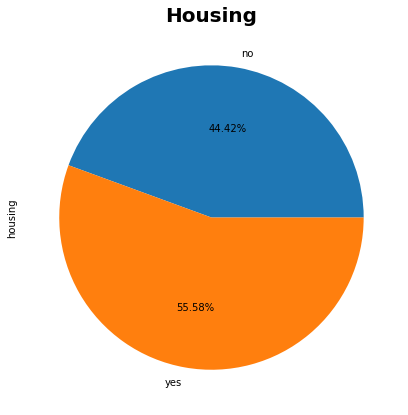

yes    25130
no     20081
Name: housing, dtype: int64


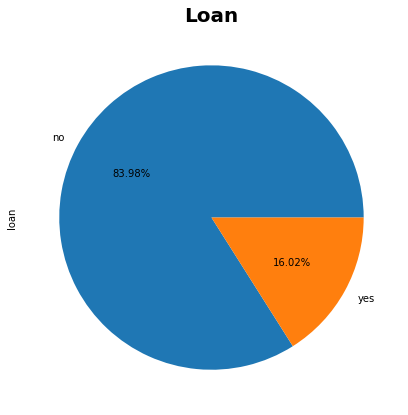

no     37967
yes     7244
Name: loan, dtype: int64


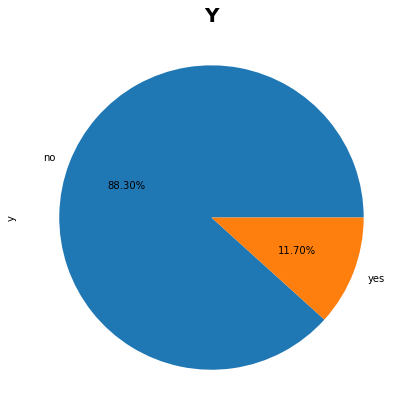

no     39922
yes     5289
Name: y, dtype: int64


In [29]:
from final_exam_functions import print_cat_pie
print_cat_pie(data_assoc)

In [30]:
file_rule=open('FinalExaml_BankResults_Data_for_Rules.csv','r')

transactions01 = [] 

lines=file_rule.readlines() 
header=lines[0].strip().split("\t")
lines=lines[1:]

num_cols=len(data_assoc.columns) 

for line in lines:
    values=line[:-1].split("\t")#Do not use strip, because if the last column has missing value, it will be stripped off together with \n     
    has_item = {}
    for i in range(num_cols): #for each of the columns
        if values[i] != '':     # If there is missing value, then no item is created. 
            item=header[i]+'='+values[i] #the corresponding item is the header+value pair (e.g. sex=FEMALE)
            has_item[item] = 1
    transactions01.append(has_item)   
    
file_rule.close()

data4 = pd.DataFrame(transactions01)
data4.fillna(0, inplace = True)
data4.to_csv('FinalExaml_BankResults_Data_Items.csv', sep='\t',index=None)

data4.head().transpose()


,0,1,2,3,4
"age=(45.0, 95.0]",1.0,0.0,0.0,1.0,0.0
job=management,1.0,0.0,0.0,0.0,0.0
marital=married,1.0,0.0,1.0,1.0,0.0
education=tertiary,1.0,0.0,0.0,0.0,0.0
default=no,1.0,1.0,1.0,1.0,1.0
"balance=(1428.0, 102127.0]",1.0,0.0,0.0,1.0,0.0
housing=yes,1.0,1.0,1.0,1.0,0.0
loan=no,1.0,1.0,0.0,1.0,1.0
y=no,1.0,1.0,1.0,1.0,1.0
"age=(35.0, 45.0]",0.0,1.0,0.0,0.0,0.0


In [31]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age=(45.0, 95.0]            45211 non-null  float64
 1   job=management              45211 non-null  float64
 2   marital=married             45211 non-null  float64
 3   education=tertiary          45211 non-null  float64
 4   default=no                  45211 non-null  float64
 5   balance=(1428.0, 102127.0]  45211 non-null  float64
 6   housing=yes                 45211 non-null  float64
 7   loan=no                     45211 non-null  float64
 8   y=no                        45211 non-null  float64
 9   age=(35.0, 45.0]            45211 non-null  float64
 10  job=technician              45211 non-null  float64
 11  marital=single              45211 non-null  float64
 12  education=secondary         45211 non-null  float64
 13  balance=(-8019.001, 72.0]   452

In [32]:
from mlxtend.frequent_patterns import fpgrowth
freq_itemsets = fpgrowth(data4, min_support = 0.05, use_colnames = True)
freq_itemsets.to_csv('FinalExaml_BankResults_Data_Items.csv', sep='\t',index=None)
freq_itemsets.tail()

,support,itemsets
1524,0.054655,"(loan=no, default=no, marital=married, y=yes)"
1525,0.053571,"(default=no, education=secondary, y=yes)"
1526,0.073677,"(default=no, housing=no, y=yes)"
1527,0.069342,"(loan=no, housing=no, y=yes)"
1528,0.069010,"(loan=no, default=no, housing=no, y=yes)"


In [33]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(freq_itemsets, metric = "lift", min_threshold = 1.25)
rules.to_csv('FinalExaml_BankResults_Data_Items.csv', sep='\t',index=None)

rules_Default_1=rules[rules['consequents']=={'y=yes'}]     #Can specify condition to filter rules
rules_Default_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3562,(housing=no),(y=yes),0.444162,0.116985,0.074185,0.167024,1.427737,0.022225,1.060072
3564,"(default=no, housing=no)",(y=yes),0.435757,0.116985,0.073677,0.169078,1.445296,0.022700,1.062693
3568,"(loan=no, housing=no)",(y=yes),0.380527,0.116985,0.069342,0.182225,1.557681,0.024826,1.079778
3572,"(loan=no, default=no, housing=no)",(y=yes),0.375838,0.116985,0.069010,0.183616,1.569570,0.025042,1.081617


In [34]:
rules_Default_1.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3562,(housing=no),(y=yes),0.444162,0.116985,0.074185,0.167024,1.427737,0.022225,1.060072
3564,"(default=no, housing=no)",(y=yes),0.435757,0.116985,0.073677,0.169078,1.445296,0.022700,1.062693
3568,"(loan=no, housing=no)",(y=yes),0.380527,0.116985,0.069342,0.182225,1.557681,0.024826,1.079778
3572,"(loan=no, default=no, housing=no)",(y=yes),0.375838,0.116985,0.069010,0.183616,1.569570,0.025042,1.081617
